In [17]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Loading Dataset
data = pd.read_csv('Dataset.csv')
print(data.head())
data.info()

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [19]:
# Data Preprocessing
data.dropna(inplace=True)  # Handling missing values

# Convert binary categorical columns to 0 and 1
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Extract the first cuisine as the primary target label
data['Primary Cuisine'] = data['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Check the new column
data[['Cuisines', 'Primary Cuisine']].head()

,Cuisines,Primary Cuisine
0,"French, Japanese, Desserts",French
1,Japanese,Japanese
2,"Seafood, Asian, Filipino, Indian",Seafood
3,"Japanese, Sushi",Japanese
4,"Japanese, Korean",Japanese


In [20]:
# Features and target
X = data[['Country Code', 'City', 'Longitude', 'Latitude',
          'Has Table booking', 'Has Online delivery',
          'Is delivering now', 'Switch to order menu',
          'Price range', 'Aggregate rating', 'Votes']]

y = data['Primary Cuisine']

# One-hot encode 'City' column
X = pd.get_dummies(X, columns=['City'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7633, 149), (1909, 149), (7633,), (1909,))

In [21]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
print("Classification Report:\n", report)

Accuracy: 0.2933
                 precision    recall  f1-score   support

        Afghani       0.00      0.00      0.00         1
        African       0.00      0.00      0.00         0
       American       0.16      0.16      0.16        55
         Andhra       0.00      0.00      0.00         1
        Arabian       0.00      0.00      0.00         0
          Asian       0.20      0.06      0.09        17
   Asian Fusion       1.00      1.00      1.00         1
       Assamese       0.00      0.00      0.00         0
            BBQ       0.00      0.00      0.00         5
         Bakery       0.17      0.17      0.17       109
       Bar Food       0.00      0.00      0.00         6
        Bengali       0.00      0.00      0.00         4
      Beverages       0.00      0.00      0.00        13
        Biryani       0.22      0.09      0.13        22
      Brazilian       0.20      0.25      0.22         4
      Breakfast       0.00      0.00      0.00         3
        Briti

c:\Users\rajpr\OneDrive\Desktop\Cognifyz_ML_Internship\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rajpr\OneDrive\Desktop\Cognifyz_ML_Internship\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rajpr\OneDrive\Desktop\Cognifyz_ML_Internship\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

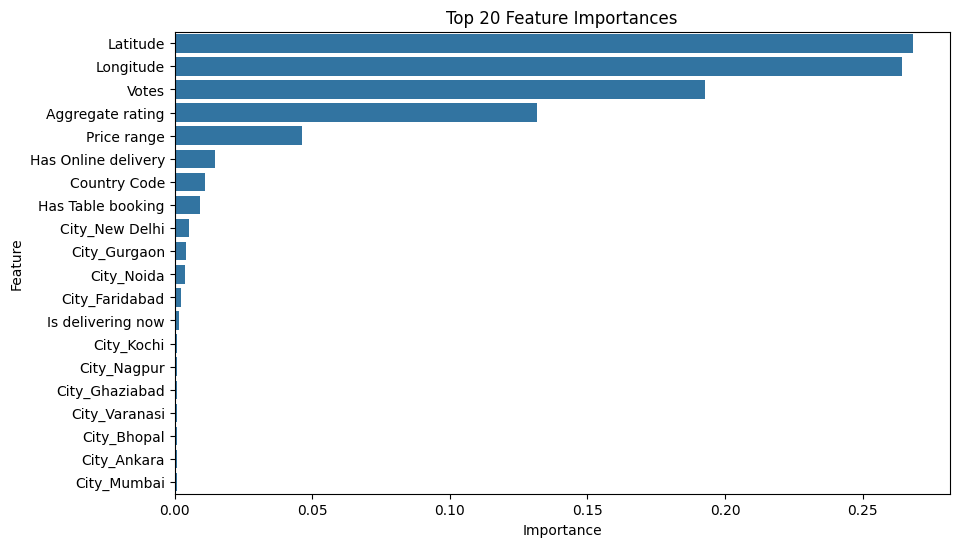

In [22]:
# Plot feature importances
importances = model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Top 20 Feature Importances')
plt.show()


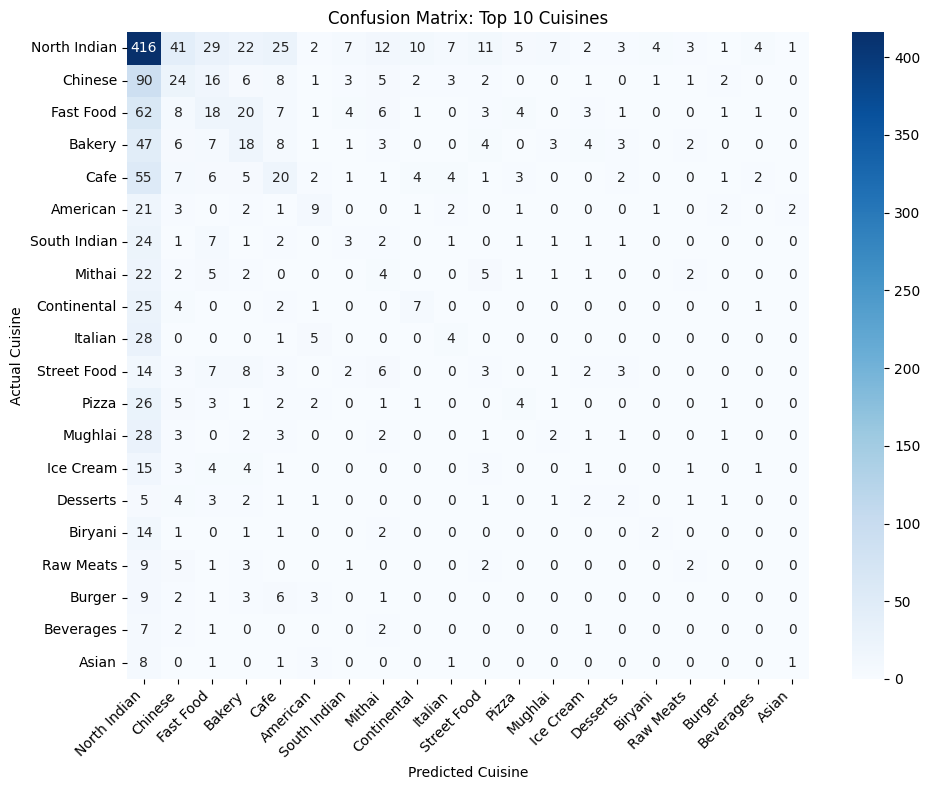

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 most frequent cuisines in training data
top_cuisines = y_train.value_counts().nlargest(20).index.tolist()

# Mask where y_test belongs to top cuisines
mask = y_test.isin(top_cuisines)

filtered_y_test = y_test[mask]
filtered_y_pred = np.array(y_pred)[mask.values]

# Compute confusion matrix
cm = confusion_matrix(filtered_y_test, filtered_y_pred, labels=top_cuisines)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_cuisines, yticklabels=top_cuisines)
plt.xlabel('Predicted Cuisine')
plt.ylabel('Actual Cuisine')
plt.title('Confusion Matrix: Top 10 Cuisines')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
